<a href="https://colab.research.google.com/github/Joyline-Rencita/AIML-Lab-Programs/blob/main/AIML_LAB_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

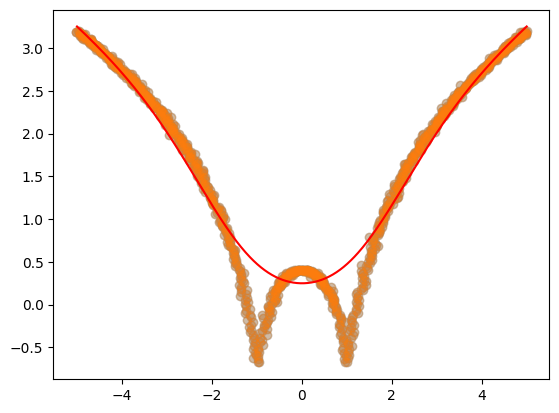

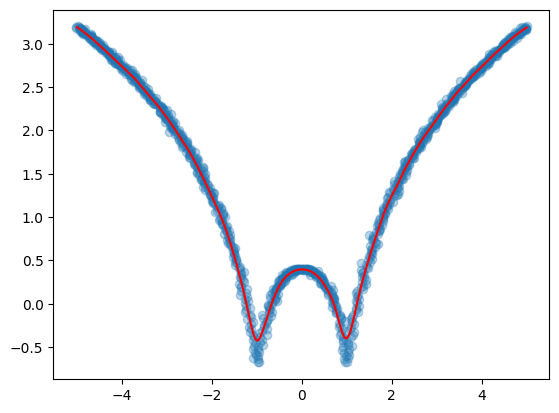

In [ ]:
## prog - 9   Locally weighted regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,1000)
y = np.log(np.abs((x ** 2)-1) + 0.5)
x= x + np.random.normal(scale = 0.05, size = 1000)
plt.scatter(x,y,alpha = 0.3)

def radial_kernel(x0,x,tau):
  return np.exp(np.sum((x-x0) ** 2, axis = 1)/ (-2 * tau ** 2))

def local_regression(x0,x,y,tau):
  x0 = np.c_[1,x0]
  x = np.c_[np.ones(len(x)),x]
  xw = x.T * radial_kernel(x0,x,tau)
  beta = np.linalg.pinv(xw @ x) @ xw @ y
  return x0 @ beta

def plot_lr(tau):
  domain = np.linspace(-5,5,num = 500)
  pred = [local_regression(x0,x,y,tau) for x0 in domain]
  plt.scatter(x,y,alpha = 0.3)
  plt.plot(domain,pred, color = "red")
  return plt

plot_lr(1).show()
plot_lr(0.1).show()

In [ ]:
## prog 8  KNN
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
x = iris.data
y = iris.target

print('sepal-length','sepal-width','petal-length','sepal-width')
print(x)

print('class : 0- Iris-setosa, 1- Iris-verticolour, 2- Iris-Virginica')
print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print('confusion matrix')
print(confusion_matrix(y_test,y_pred))

print('Accuracy matrix')
print(classification_report(y_test,y_pred))

sepal-length sepal-width petal-length sepal-width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]


In [ ]:
## prog : 5   ANN
import numpy as np

x = np.array(([2,6],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)

x = x/np.amax(x, axis=0)
y = y/100

def sigmoid(x):
  return 1/(1+np.exp(-x))

def derivatives_sigmoid(x):
  return x*(1-x)

epoch = 5000
lr = 0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
outputlayer_neurons = 1

wh = np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh = np.random.uniform(size=(1,hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons,outputlayer_neurons))
bout = np.random.uniform(size=(1,outputlayer_neurons))

for i in range(epoch):
  hinp1 = np.dot(x,wh)
  hinp = hinp1 + bh
  hlayer_act = sigmoid(hinp)
  outinp1 = np.dot(hlayer_act,wout)
  outinp = outinp1 + bout
  output = sigmoid(outinp)

  EO = y - output
  outgrad = derivatives_sigmoid(output)
  d_output = EO * outgrad

  EH = d_output.dot(wout.T)
  hiddengrad = derivatives_sigmoid(hlayer_act)
  d_hidden = EH * hiddengrad

  wh+= x.T.dot(d_hidden)*lr
  wout+=hlayer_act.T.dot(d_output)*lr


print('Input : '+str(x))
print('Actual Output : '+str(y))
print('Predicted output : ',output)



Input : [[0.66666667 1.        ]
 [0.33333333 0.83333333]
 [1.         1.        ]]
Actual Output : [[0.92]
 [0.86]
 [0.89]]
Predicted output :  [[0.89092599]
 [0.88353052]
 [0.8955073 ]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Load Data from CSV
data = pd.read_csv('/content/drive/MyDrive/contents/tennis - tennis.csv')
print("The entire dataset :\n", data.head())

The entire dataset :
     Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes


In [ ]:
X = data.iloc[:,:-1]
print("The first 5 values of train dataset are : \n",data.head())

y = data.iloc[:,-1]
print("\nThe tain data output is: \n",y.head())

The first 5 values of train dataset are : 
     Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes

The tain data output is: 
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## prog 6  Naive Bayes

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# load the data
data = pd.read_csv('/content/drive/MyDrive/contents/tennis - tennis.csv')
print('The entire dataset is : \n',data.head())

# print 5 cols
X = data.iloc[:,:-1]
print('\nThe train data is : \n',X.head())
y = data.iloc[:,-1]
print('\nThe train output is : \n',y.head())

## now replace with nums using label encoder
le_Outlook = LabelEncoder()
X.Outlook = le_Outlook.fit_transform(X.Outlook)

le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)

le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)

le_Wind = LabelEncoder()
X.Wind = le_Wind.fit_transform(X. Wind)

print('The trained dataset is: \n',X.head())

le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)

print('The trained data is: \n',y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size = 0.2)

# Print shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print('\n\n')

classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('Accuracy is: \n', accuracy_score(classifier.predict(X_test),y_test))
print('\n\n')

The entire dataset is : 
     Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes

The train data is : 
     Outlook Temperature Humidity    Wind
0     Sunny         Hot     High    Weak
1     Sunny         Hot     High  Strong
2  Overcast         Hot     High    Weak
3      Rain        Mild     High    Weak
4      Rain        Cool   Normal    Weak

The train output is : 
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object
The trained dataset is: 
    Outlook  Temperature  Humidity  Wind
0        2            1         0     1
1        2            1         0     0
2        0            1         0     1
3        1            2         0     1
4        1            0         1     1

Now the Train output is


<ipython-input-27-0cf6ad66e7f5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Outlook = le_Outlook.fit_transform(X.Outlook)
<ipython-input-27-0cf6ad66e7f5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Temperature = le_Temperature.fit_transform(X.Temperature)
<ipython-input-27-0cf6ad66e7f5>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


x:  [[1.  1. ]
 [1.5 2. ]
 [3.  4. ]
 [5.  7. ]
 [3.5 5. ]
 [4.5 5. ]
 [3.5 4.5]]
The graph for the dataset is:



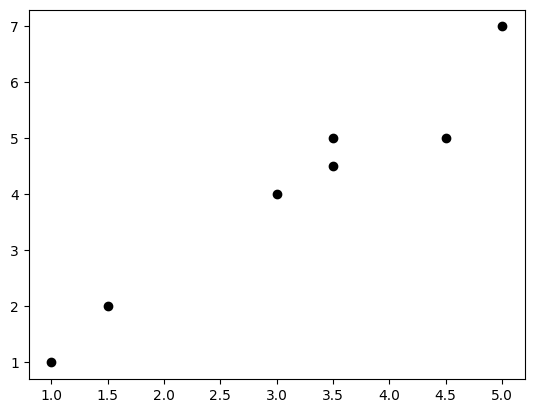



Labels are :  [1 1 0 0 0 0 0]
Graph ofr kmeans is :


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


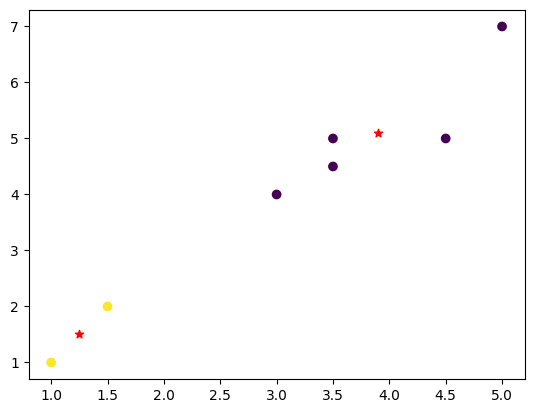

Labels are :  [1 1 0 0 0 0 0]
Graph for EL Agorithm is :


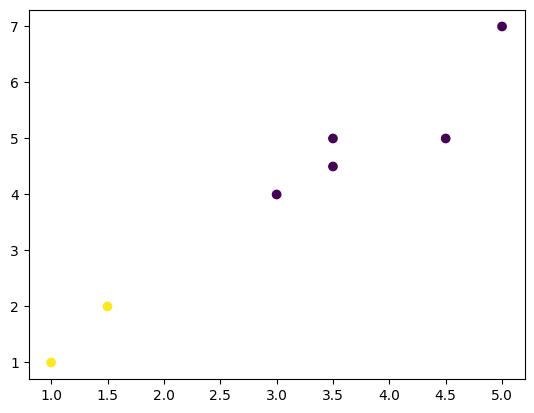

In [ ]:
# prog 7 :  KMeans

import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# load the data
data = pd.read_csv('/content/drive/MyDrive/contents/prog7.csv')
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1,f2)))
print('x: ',X)
print('The graph for the dataset is:\n')
plt.scatter(f1, f2, c="black")
plt.show()
print("\n")

kmeans = KMeans(2)
labels = kmeans.fit(X).predict(X)
print("Labels are : ",labels)
print("Graph ofr kmeans is :")
plt.scatter(f1, f2, c=labels)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='red')
plt.show()

gmm = GaussianMixture(2)
labels = gmm.fit(X).predict(X)
print("Labels are : ",labels)
print("Graph for EL Agorithm is :")
plt.scatter(f1, f2, c=labels)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## prog3

dataarr = []
with open('/content/drive/MyDrive/contents/porg3.csv') as f:
  for line in f :
    dataarr.append(line.strip().split(','))

##exceptional
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/contents/porg3.csv')
print(data)
print("\n")

rows = len(dataarr)
cols = len(dataarr[0])
shypo = ['0']*(cols-1)
ghypo = [['?']*(cols-1)]
print("Initial specific hypothesis = ",shypo)
print("Initial general hypothesis = ",ghypo)

for x in range(1,rows):
  lst = dataarr[x]
  if lst[cols-1] == "yes":
    for i in range(0,cols-1):
      if(shypo[i]==lst[i]):
        continue
      shypo[i] = '?' if shypo[i]!='0' else lst[i]
      for g in ghypo:
        if g[i]!='?' and shypo[i]=='?':
          ghypo.remove(g)

  elif lst[cols-1] == "no":
    for i in range(0,cols-1):
      if lst[i] !=shypo[i] and shypo[i]!='?':
        temp_lst = ['?']*i + [shypo[i]] + (['?']*(cols-2-i))
        if temp_lst not in ghypo:
          ghypo.append(temp_lst)

  print("S Hypothesis after row",x, "=",shypo)
  print("G Hypothesis after row",x, "=",ghypo)

print("Final Hypothesis ",shypo)
print("Final Hypothesis ",ghypo)

     sky airTemp humidity    wind water forecast enjoySport
0  sunny    warm   normal  strong  warm     same        yes
1  sunny    warm     high  strong  warm     same        yes
2  rainy    cold     high  strong  warm   change         no
3  sunny    warm     high  strong  cool   change        yes


Initial specific hypothesis =  ['0', '0', '0', '0', '0', '0']
Initial general hypothesis =  [['?', '?', '?', '?', '?', '?']]
S Hypothesis after row 1 = ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
G Hypothesis after row 1 = [['?', '?', '?', '?', '?', '?']]
S Hypothesis after row 2 = ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G Hypothesis after row 2 = [['?', '?', '?', '?', '?', '?']]
S Hypothesis after row 3 = ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G Hypothesis after row 3 = [['?', '?', '?', '?', '?', '?'], ['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
S Hypothesis after row 4 = ['sunny', 'warm', '?', 'str

In [ ]:
## prog 4 ID3

import pandas as pd
df_tennis = pd.read_csv('/content/drive/MyDrive/contents/prog4.csv')
print("\n Giveen Play Tennis Data set:\n\n",df_tennis)

def entropy(probs):
    import math
    return sum([-prob*math.log(prob,2) for prob in probs])

def entropy_of_list(a_list):
    from collections import Counter
    cnt = Counter(x for x in a_list)
    num_instances = len(a_list)*1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)

def information_gain(df, split_attribute_name, target_attribute_name, trace=0):
   df_split = df.groupby(split_attribute_name)
   nobs = len(df.index) * 1.0
   df_agg_ent = df_split.agg({target_attribute_name:[entropy_of_list, lambda x:
   len(x)/nobs] })[target_attribute_name]
   df_agg_ent.columns = ['Entropy', 'PropObservations']
   new_entropy = sum( df_agg_ent['Entropy'] * df_agg_ent['PropObservations'] )
   old_entropy = entropy_of_list(df[target_attribute_name])
   return old_entropy - new_entropy

def id3(df, target_attribute_name, attribute_names, default_class=None):
    from collections import Counter
    cnt = Counter(x for x in df[target_attribute_name])
    print(cnt)
    if len(cnt) == 1:
        print(len(cnt))
        return next(iter(cnt))
    elif df.empty or (not attribute_names):
        return default_class
    else:
        default_class=max(cnt.keys())
        gainz = [information_gain(df, attr, target_attribute_name) for attr in attribute_names]
        print("Gain=",gainz)
        index_of_max=gainz.index(max(gainz))
        best_attr = attribute_names[index_of_max]
        print("Best Attribute:",best_attr)
        tree = {best_attr:{}}
        remaining_attribute_names = [i for i in attribute_names if i != best_attr]

        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,
                        target_attribute_name,
                        remaining_attribute_names,
                        default_class)
            tree[best_attr][attr_val] = subtree
        return tree

attribute_names = list(df_tennis.columns)
print("\n\nList of Attributes:", attribute_names)
attribute_names.remove('PlayTennis')
print("\nPredicting Attributes: \n", attribute_names)

from pprint import pprint
tree = id3(df_tennis,'PlayTennis',attribute_names)
print("\n\nThe resultant Decision Tree is : \n")
pprint(tree)




 Giveen Play Tennis Data set:

    PlayTennis   Outlook Temperature Humidity    Wind
0          No     Sunny         Hot     High    Weak
1          No     Sunny         Hot     High  Strong
2         Yes  Overcast         Hot     High    Weak
3         Yes      Rain        Mild     High    Weak
4         Yes      Rain        Cool   Normal    Weak
5          No      Rain        Cool   Normal  Strong
6         Yes  Overcast        Cool   Normal  Strong
7          No     Sunny        Mild     High    Weak
8         Yes     Sunny        Cool   Normal    Weak
9         Yes      Rain        Mild   Normal    Weak
10        Yes     Sunny        Mild   Normal  Strong
11        Yes  Overcast        Mild     High  Strong
12        Yes  Overcast         Hot   Normal    Weak
13         No      Rain        Mild     High  Strong


List of Attributes: ['PlayTennis', 'Outlook', 'Temperature', 'Humidity', 'Wind']

Predicting Attributes: 
 ['Outlook', 'Temperature', 'Humidity', 'Wind']
Counter({'Yes': 

In [ ]:
def aStarAlgo(start_node,stop_node):
    open_set=set(start_node)
    closed_set=set()
    g={}
    parents={}

    g[start_node]=0
    parents[start_node]=start_node

    while len(open_set)>0:
        n=None

        for v in open_set:
            if n==None or g[v] + heuristic(v) <g[n] + heuristic(n):
                n=v

        if n==stop_node or Graph_nodes[n]==None:
            pass
        else:
            for(m,weight) in get_neighbors(n):
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m]=n
                    g[m]=g[n] + weight
                else:
                    if g[m]>g[n] + weight:
                        g[m]=g[n] + weight
                        parents[m]=n

                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)

        if n==None:
            print('Path does not exist!')
            return None

        if n==stop_node:
            path=[]

            while parents[n]!=n:
                path.append(n)
                n=parents[n]

            path.append(start_node)
            path.reverse()

            print('Path found:{}'.format(path))
            return path
        open_set.remove(n)
        closed_set.add(n)
    print('Path does not exist')
    return None

def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

def heuristic(n):
    H_dist={
        'A':11,
        'B':6,
        'C':99,
        'D':1,
        'E':7,
        'G':0
    }
    return H_dist[n]

Graph_nodes={
    'A':[('B',2),('E',3)],
    'B':[('G',9),('C',1)],
    'E':[('D',6)],
    'D':[('G',1)]
    }

aStarAlgo('A','G')

def heuristic(n):
    H_dist={
        'A':11,
        'B':6,
        'C':5,
        'D':7,
        'E':3,
        'F':6,
        'G':5,
        'H':3,
        'I':1,
        'J':0
    }
    return H_dist[n]

Graph_nodes= {
    'A':[('B',6),('F',3)],
    'B':[('A',6),('C',3),('D',2)],
    'C':[('B',3),('D',1),('E',5)],
    'D':[('B',2),('C',1),('E',8)],
    'E':[('C',5),('D',8),('I',5),('J',5),],
    'F':[('A',3),('G',1),('H',7)],
    'G':[('F',1),('I',3),],
    'H':[('F',7),('I',2),],
    'I':[('E',5),('G',3),('H',2),('J',3),]
}

aStarAlgo('A','J')

Path found:['A', 'E', 'D', 'G']
Path found:['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']

In [ ]:
## prog 2 :  AO* Algorithm

class Graph:
    def __init__(self,graph,heuristicNodeList,startnode):
        self.graph=graph
        self.H=heuristicNodeList
        self.start=startnode
        self.parent={}
        self.status={}
        self.solutionGraph={}

    def applyAOStar(self):
        self.aoStar(self.start,False)

    def getNeigbors(self,v):
        return self.graph.get(v,"")
    def getStatus(self,v):
        return self.status.get(v,0)
    def setStatus(self,v,val):
        self.status[v]=val

    def getHeuristicNodeValue(self,n):
        return self.H.get(n,0)

    def setHeuristicNodeValue(self,n,value):
        self.H[n]=value

    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE: ",self.start)
        print("-------------------------------------------------------------")
        print(self.solutionGraph)
        print("-------------------------------------------------------------")
    def computeMinimumCostChildNodes(self,v):
        minimumCost = 0
        costToChildNodeListDict = {}
        costToChildNodeListDict[minimumCost] = []
        flag = True
        for nodeInfoTupleList in self.getNeigbors(v):
            cost = 0
            nodeList = []
            for c,weight in nodeInfoTupleList:
                cost = cost + self.getHeuristicNodeValue(c) + weight
                nodeList.append(c)
            if flag == True:
                minimumCost = cost
                costToChildNodeListDict[minimumCost] = nodeList
                flag = False
            else:
                if minimumCost > cost:
                    minimumCost = cost
                    costToChildNodeListDict[minimumCost] = nodeList
        return minimumCost,costToChildNodeListDict[minimumCost]
    def aoStar(self,v,backTracking):
        print("HEURISTIC VALUES : ",self.H)
        print("SOLUTION GRAPH : ",self.solutionGraph)
        print("PROCESSING NODE : ",v)
        print("--------------------------------------------------------------------")
        if self.getStatus(v) >=0 :
            minimumCost,childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v,minimumCost)
            self.setStatus(v,len(childNodeList))
            solved = True
            for childNode in childNodeList:
                self.parent[childNode] = v
                if self.getStatus(childNode) != -1:
                    solved = solved & False
            if solved == True:
                self.setStatus(v,-1)
                self.solutionGraph[v] = childNodeList
            if v != self.start:
                self.aoStar(self.parent[v],True)
            if backTracking == False:
                for childNode in childNodeList:
                    self.setStatus(childNode,0)
                    self.aoStar(childNode,False)

h1 = {'A':1,'B':6,'C':2,'D':12,'E':2,'F':1,'G':5,'H':7,'I':7,'J':1,'T':3}
graph1 = {
'A': [[('B',1),('C',1)],[('D',1)]],
'B': [[('G',1)],[('H',1)]],
'C': [[('J',1)]],
'D': [[('E',1),('F',1)]],
'G': [[('I',1)]]
}
G1 = Graph(graph1,h1,'A')
G1.applyAOStar()

G1.printSolution()


HEURISTIC VALUES :  {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH :  {}
PROCESSING NODE :  A
--------------------------------------------------------------------
HEURISTIC VALUES :  {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH :  {}
PROCESSING NODE :  B
--------------------------------------------------------------------
HEURISTIC VALUES :  {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH :  {}
PROCESSING NODE :  A
--------------------------------------------------------------------
HEURISTIC VALUES :  {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH :  {}
PROCESSING NODE :  G
--------------------------------------------------------------------
HEURISTIC VALUES :  {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 8, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SO